<a name="top"></a>
<br/>
# Feed Forward Networks
<br/>

**École Nationale Supérieure des Mines de Nancy**  
  

Lecture: **Deep Learning** by [Parisa Rastin](https://sites.google.com/site/parisarastinresearch/home) and [Christophe Cerisara](https://members.loria.fr/CCerisara/).

Author: [Lucas Lherbier](https://www.linkedin.com/in/lucas-lherbier/).

***
This notebook presents two main single-layer artificial neural networks: the `Adaline` and the `Perceptron`. There are implemented from scratch, i.e without any machine learning library. For those two machine learning models, some instructions are given at the beginning of the respective sections. 

***
---
## Imports

In [1]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
import itertools

from IPython.display import Image

<br>

# Adaline

## Instructions

* Generate a 2-D dataset composed from two linearly separable classes. Generate 50 objects for each class.
* Visualize the data with a scatter plot.
* Write an Adaline function
 * Compute the difference between the desired output (class) and the output calculated by `Adaline`.
 * Compute an approximation of the gradient.
 * Update the weights of the connections in Adaline according to the gradient.
 * Initialize the values of the weights to $w_0 = 0.3$ (weight of the bias), $w_1 = 0.8$, $w_2 = 0.4$ and the gradient step to $\eta = 0.01$.
 * At each iteration of the learning process, graphically represent all the samples and the hyperplane separating the two classes in the same orthogonal reference frame

## Data creation



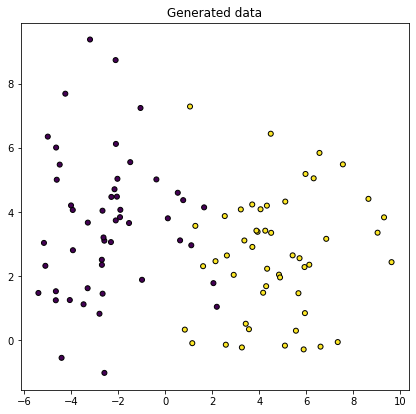

In [2]:
def data(std): 
    X, y = make_blobs(n_samples=100, centers=2, n_features=2,cluster_std=std)
    xmax = max(X[:, 0]) + 1
    xmin = min(X[:, 0]) - 1
    return X, y, xmax, xmin

X,y,xmax, xmin = data(2)
plt.figure(figsize=(6, 6))
plt.title("Generated data", fontsize='large')
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25, edgecolor='k')
plt.show()

## Useful functions

We create several functions that will be used in the Adaline algorithm:
* `err_adal`: compute the difference between the desired output (class) and the output calculated
* `grad_adal` : compute an approximation of the gradient
* `adapt_adal` : update the weights of the connections in Adaline according to the gradient
* `decision_line`: return the decision line whose parameters has been calculated by Adaline
* `plot_one`: plot the the samples and the hyperplane separating the two classes at a specific iteration
* `plot_evolution`: plot on the same window the the samples and different hyperplanes during learning process

In [3]:
def err_adal(y,w,x) : 
    return  (y - np.dot(np.array(w),np.array(x)))**2  

def grad_adal(y,w,x) : 
    return  - 2*np.multiply(y - np.dot(w,x),x)

def adapt_adal(w, grad,pas) : 
    return w - pas*grad

def decision_line(x,w) : 
    return -w[0]/w[2]-x*w[1]/w[2]

In [4]:
def plot_one(X, y,xmax, xmin, w, cpt, choice) : 
    plt.figure(figsize=(6, 6))    
    plt.title(choice + ": step " + str(cpt), size=16)
    plt.plot([xmin,xmax],[decision_line(x,w) for x in [2*xmin,xmax*2]])
    plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25, edgecolor='k')
    return

# For legend with colors
Ncolors = 8
colormap = plt.cm.viridis# LinearSegmentedColormap
Ncolors = min(colormap.N,Ncolors)
mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
N = Ncolors*4+10
l_styles = ['-','--','-.',':']
m_styles = ['','.','o','^','*']

def plot_evolution(X,y,xmax, xmin, list_w,nb,choice):
    plt.figure(figsize=(6, 6))    
    fig,ax = plt.subplots(gridspec_kw=dict(right=0.6))
    plt.title( choice +' algorithm', size=16)
    i = 0
    for w, (marker,linestyle,color) in zip(list_w,itertools.product(m_styles,l_styles, mapcolors)) : 
        plt.plot([xmin,xmax],[decision_line(x,w) for x in [2*xmin,2*xmax]],color=color, linestyle=linestyle,marker=marker, label = 'step ' + str(nb*(i+1)))
        ax.legend(bbox_to_anchor=(1.3, 1), loc='best', borderaxespad=0.,ncol=1,prop={'size': 8})
        i +=1
    plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25, edgecolor='k')
    return  

## Adaline algorithmn

The **Adaline algorithm** is mainly inspired by the lecture [Machine Learning](http://users.isr.ist.utl.pt/~alex/aauto0910/lecture5Adaline.pdf) of *Alexandre Bernardino*.

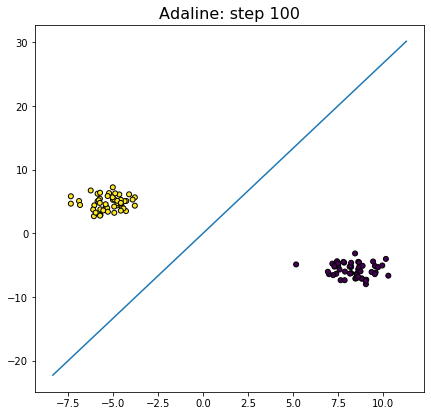

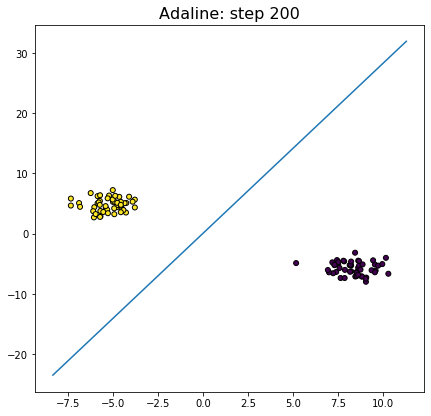

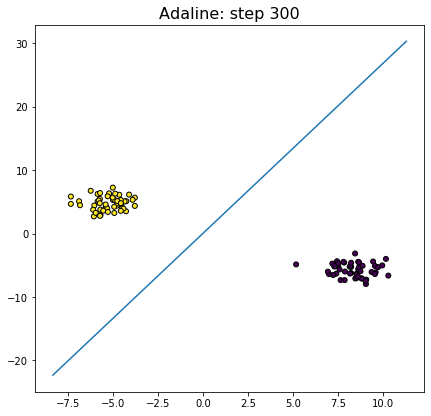

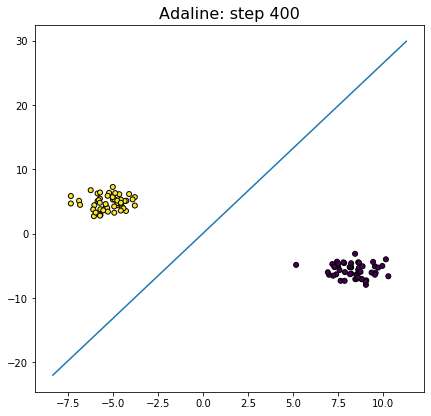

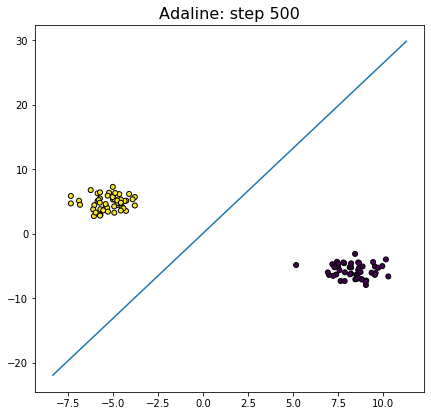

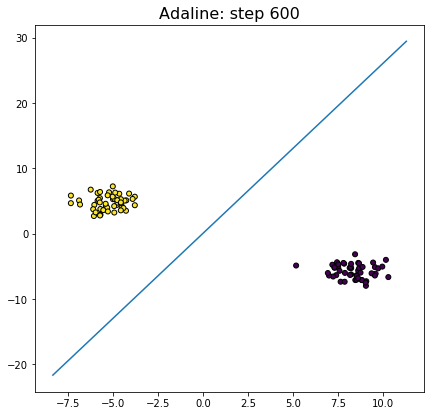

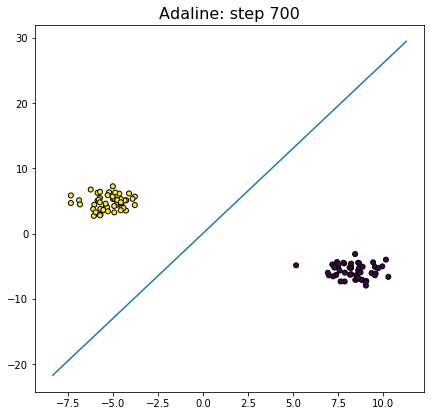

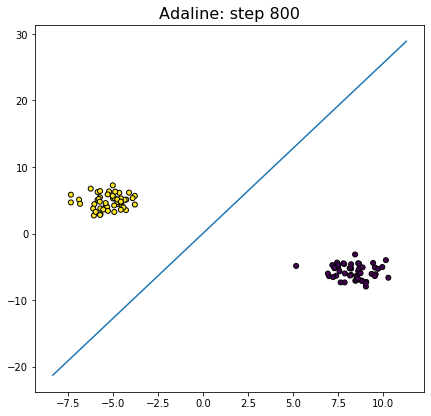

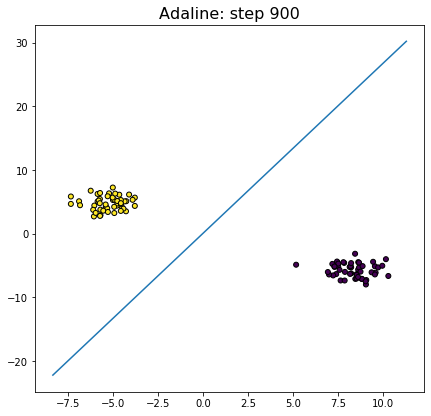

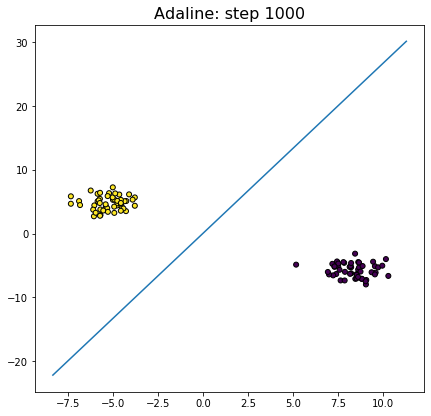

<Figure size 432x432 with 0 Axes>

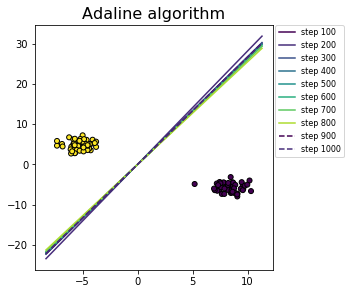

In [14]:
def Adaline(iteration, evolution, step = 0.01) :
    X, y, xmax, xmin = data(1)
    w = [0.3,0.8,0.4]
    cpt = 0 
    nb = int(X.shape[0]/5)
    list_grad = []
    list_w = []
    for batch in range(10) :
        for j in range(5) : 
            k_index = [rd.randint(0,X.shape[0]-1) for i in range(nb)] 
            for k in k_index:
                x_k = [1,X[k][0],X[k][1]]
                y_k = y[k]
                list_grad.append(grad_adal(y_k,w,x_k))
            cpt += nb
        w = w - np.mean(list_grad, axis = 0)
        list_w.append(w)
        if iteration : 
            plot_one(X, y,xmax, xmin, w, cpt, 'Adaline')
    if evolution : 
        return plot_evolution(X,y, xmax, xmin, list_w, 100,'Adaline')  

Adaline(True, True, step = 0.01)

<br>

# Perceptron

## Instructions

* Write a `Perceptron`function
 * Estimate the output computed by the `Perceptron`
 * Compute an approximation of the gradient.
 * Update the weights of the connections in `Perceptron` according to the gradient.
 * Use the same initialization values given for `Adaline` will be used.
 * At each iteration of the learning, graphically represent all the samples and the hyperplane separating the two classes in the same orthogonal reference frame.

## Data creation



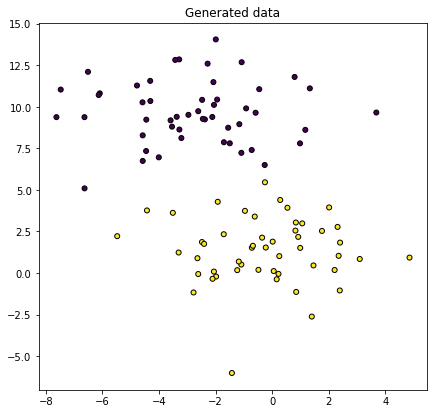

In [6]:
X,y,xmax, xmin = data(2)
plt.figure(figsize=(6, 6))
plt.title("Generated data", fontsize='large')
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25, edgecolor='k')
plt.show()

## Useful functions

We create several functions that will be used in the Perceptron algorithm:
* `output_perc`: estimate the output computed by the Perceptron
* `grad_perc`: compute an approximation of the gradient
* `decision_function`: return the expected class after computing the dot product
* `adapt_perc`: update the weights of the connections in Perceptron according to the gradient

In [7]:
def output_perc(w,x) : 
    z = np.dot(w,x)
    return 1/(1+np.exp(-z))

def grad_perc(w,x):
    return output_perc(w,x)*(1-output_perc(w,x)) #for sigmoid function

def decision_function(w, x):
    z = np.dot(w,x)
    if z > 0 : 
        return 1
    else : 
        return 0

def adapt_perc(w, x,y, z, step):
   return w + np.multiply(step*(y-z),x)
    

## Perceptron algorithm

This algorithm is mainly inspired by the the section [Perceptron Learning Algorithm](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975).

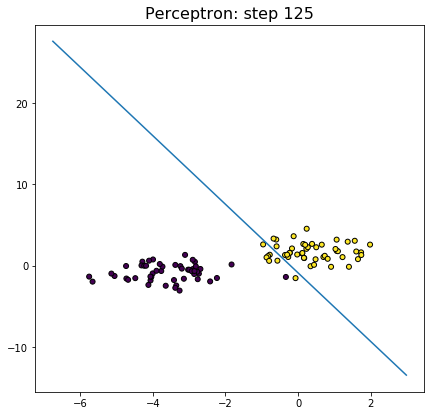

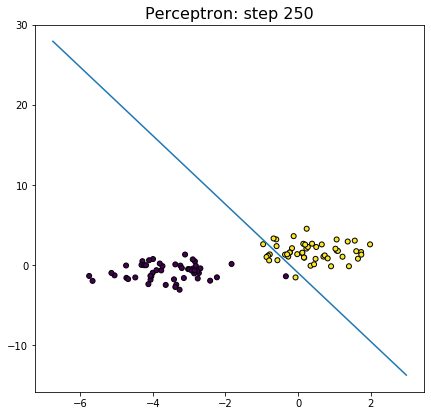

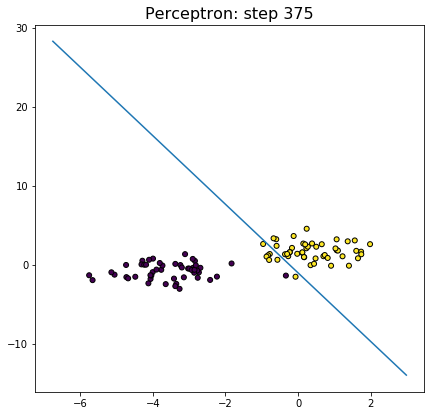

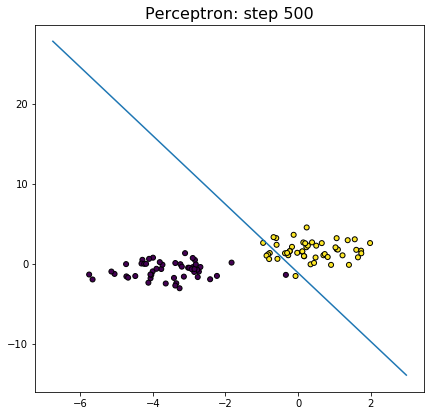

<Figure size 432x432 with 0 Axes>

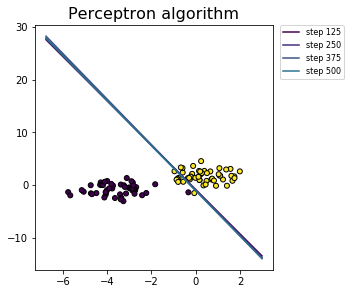

In [23]:
def Perceptron_bis(iteration, evolution, step = 0.01) :
    X, y, xmax, xmin = data(1)
    w = [0.3,0.8,0.4]
    seuil = 0.01
    error = [1]
    cpt = 0 
    list_w = []
    nb = int(X.shape[0]/4)
    while np.mean(error)>seuil and cpt < 1000:
        k_index = [rd.randint(0,X.shape[0]-1) for i in range(nb)]     
        error = []
        for k in k_index : 
            x_k = [1,X[k][0],X[k][1]]
            y_k = y[k]
            z = decision_function(w, x_k)
            w = adapt_perc(w, x_k, y_k, z, step)
        cpt += nb
        for k in range(X.shape[0]) : 
            x_k = [1,X[k][0],X[k][1]]
            y_k = y[k]
            z = decision_function(w, x_k)
            error.append(abs(y_k - z))
            w = adapt_perc(w, x_k, y_k, z, step)
        list_w.append(w)
        cpt += X.shape[0]
        if iteration : 
            plot_one(X, y,xmax, xmin, w, cpt, 'Perceptron')      
    if evolution : 
        return plot_evolution(X,y, xmax, xmin, list_w, 125,'Perceptron')

Perceptron_bis(True, True, step = 0.01)

____

<span style="font-size: 12px"><i>Jupyter Notebook **Feed_forward_networks.ipynb**<br>
Last modified on Dec 24, 2019<br>
</i></span>